<a href="https://colab.research.google.com/github/Evandeta/BengkelKoding/blob/main/12938_Evan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  Pengumpulan Data
2.  Menelaah Data
3.  Validasi Data
4.  Menentukan Objek Data
5.  Membersihkan Data
6.  Konstruksi Data
7.  Menentukan Label Data
8.  Modelling
9.  Evaluasi

# Menelaah Data

In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

# Load Data

In [ ]:
#dir adalah variabel yang digunakan untuk menyimpan data
dir = 'cleveland.data'

**Buatlah iterasi untuk membaca dataset**

In [ ]:
with open(dir, encoding= 'Latin1') as file:
  lines = [line.strip() for line in file]
lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [ ]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i: (i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
277,294,0,39,0,-9,-9,-9,-9,3,138,...,1,1,1,1,1,1,2,-9,-9,name
278,295,0,57,1,-9,-9,-9,-9,2,154,...,1,1,1,1,1,1,1,-9,-9,name
279,296,0,58,0,-9,-9,-9,-9,4,130,...,1,1,1,1,1,1,1,-9,-9,name
280,297,0,57,1,-9,-9,-9,-9,4,110,...,1,2,1,1,1,1,1,-9,-9,name
281,298,0,47,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [ ]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [ ]:
df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

# Validasi Data

In [ ]:
df.replace(-9.0, np.nan, inplace=True)

df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

# Menentukan Object Data

In [ ]:
df_selected = df.iloc[:, [1, 2, 3, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

In [ ]:
df_selected.head()

,2,3,4,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,NaN,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,NaN,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,NaN,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,NaN,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,NaN,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
df_selected.tail()

,2,3,4,9,11,15,18,31,37,39,40,43,50,57
277,39.0,0.0,NaN,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0.0
278,57.0,1.0,NaN,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1.0
279,58.0,0.0,NaN,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0.0
280,57.0,1.0,NaN,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2.0
281,47.0,1.0,NaN,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0.0


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   4       0 non-null      float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


**Mengganti kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset**

In [ ]:
columns_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'num'
}

df_selected.rename(columns= columns_mapping, inplace=True)

<ipython-input-64-50e1e0d12b8c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns= columns_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   4         0 non-null      float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  num       282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
df_selected.value_counts()

Series([], dtype: int64)

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
4           282
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            2
thal          2
num           0
dtype: int64

# Membersihkan Data

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
4           282
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            2
thal          2
num           0
dtype: int64

In [ ]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanFbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanThalach = df_selected['thalach'].dropna()
meanExang = df_selected['exang'].dropna()

In [ ]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanFbs = meanFbs.astype(float)
meanThalach = meanThalach.astype(float)
meanExang = meanExang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [ ]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanFbs = round(meanFbs.mean())
meanThalach = round(meanThalach.mean())
meanExang = round(meanExang.mean())
meanRestCG = round(meanRestCG.mean())

In [ ]:
fill_values = {'trestbps' : meanTBPS, 'chol' : meanChol,
               'fbs' : meanFbs, 'thalach' : meanThalach,
               'exang' : meanExang, 'restecg' : meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   4         0 non-null      float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  num       282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
dfClean.isnull().sum()

age           0
sex           0
4           282
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            2
thal          2
num           0
dtype: int64

In [ ]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [ ]:
print("All Duplicate_rows")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate_rows


,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [ ]:
dfClean = dfClean.drop_duplicates()

In [ ]:
print("All Duplicate Rows : ")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows : 


,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [ ]:
dfClean.head()

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,NaN,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,NaN,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,NaN,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,NaN,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,NaN,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
dfClean['num'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: num, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfClean.corr()

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.091125,NaN,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.356907,0.104029,0.210747
sex,-0.091125,1.000000,NaN,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.093442,0.391405,0.239516
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,0.274466,-0.058920,NaN,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080314,0.123241,0.151776
chol,0.218295,-0.189397,NaN,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.130589,0.041567,0.098895
fbs,0.104400,0.054396,NaN,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.116382,0.063560,0.039690
restecg,0.134438,0.032665,NaN,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112573,0.020900,0.187365
thalach,-0.393266,-0.054792,NaN,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.255718,-0.257060,-0.396194
exang,0.087174,0.189095,NaN,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151385,0.335830,0.398880
oldpeak,0.195740,0.103771,NaN,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.256953,0.332293,0.487529


<Axes: >

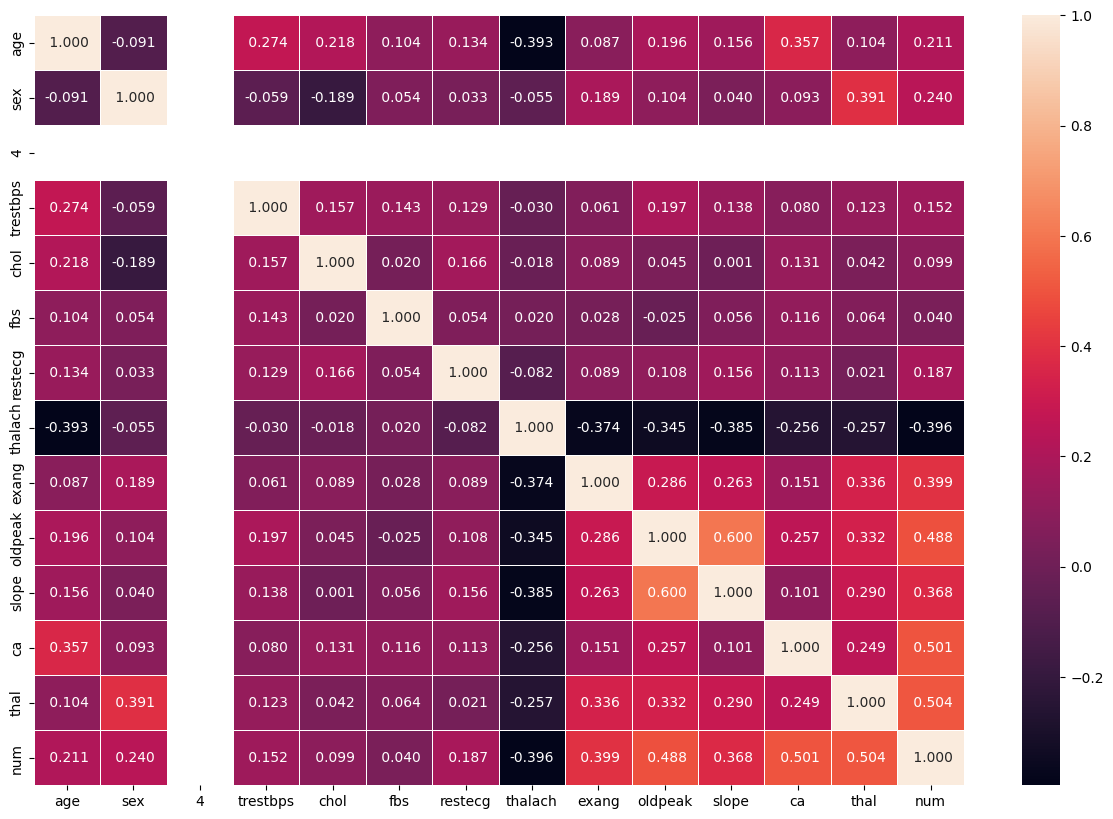

In [ ]:
cor_mat = dfClean.corr()
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidth=0.5, fmt=" .3f")

# Konstruksi Data

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   4         0 non-null      float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  num       282 non-null    float64
dtypes: float64(14)
memory usage: 33.0 KB


In [ ]:
dfClean.head(10)

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,NaN,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,NaN,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,NaN,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,NaN,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,NaN,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
5,56.0,1.0,NaN,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
6,62.0,0.0,NaN,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
7,57.0,0.0,NaN,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
8,63.0,1.0,NaN,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
9,53.0,1.0,NaN,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0


In [ ]:
X = dfClean.drop("num",axis=1).values
y = dfClean.iloc[:,-1]

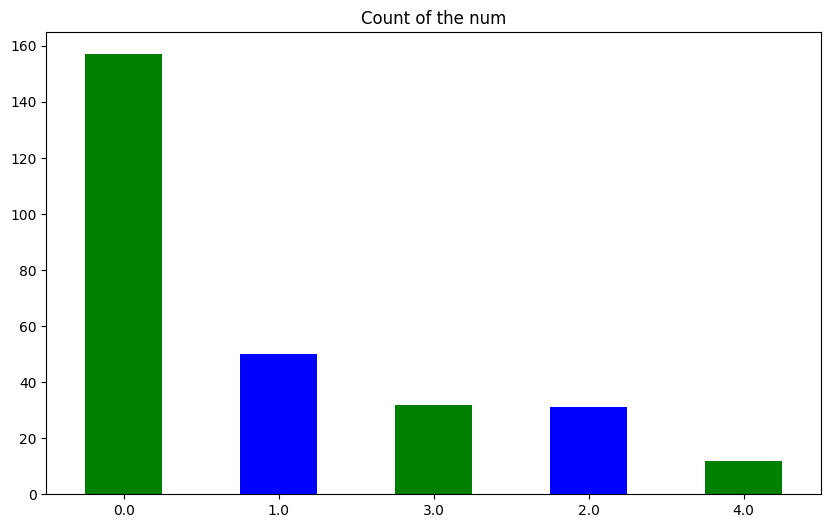

In [ ]:
dfClean['num'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the num")
plt.xticks(rotation=0);

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_imputed, y)

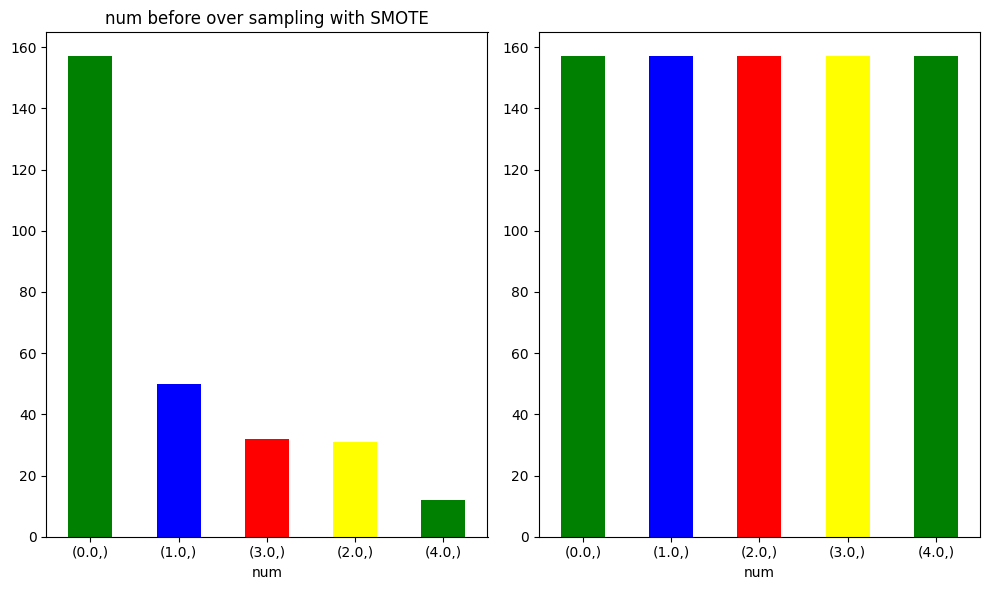

In [ ]:
plt.figure(figsize=(12,4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("num before over sampling with SMOTE")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [ ]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

num
0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
dtype: int64

In [ ]:
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

num
0.0    157
1.0    157
2.0    157
3.0    157
4.0    157
dtype: int64

In [ ]:
dfClean.describe()

,age,sex,4,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,0.0,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,280.000000,280.000000,282.000000
mean,54.411348,0.677305,NaN,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.664286,4.678571,0.907801
std,9.053083,0.468338,NaN,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.936023,1.939101,1.224894
min,29.000000,0.000000,NaN,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,NaN,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,NaN,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,NaN,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,NaN,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled_normal)

785

In [ ]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559256,0.780670,0.374617,0.285396,0.140156,0.602939,0.542349,0.457198,0.238403,0.381669,0.349119,0.638013
std,0.168520,0.374987,0.149341,0.111155,0.310012,0.440887,0.160903,0.443732,0.180556,0.258542,0.323272,0.423378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.264151,0.207870,0.000000,0.000000,0.422710,0.000000,0.091628,0.097991,0.000000,0.119594
50%,0.583333,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.350367,0.225806,0.500000,0.333333,0.887086
75%,0.678864,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.370968,0.500000,0.657261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

X_train_normal, X_test_normal, y_train_normal,y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# Modelling

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [ ]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
                 'recall': round(rcl,3),
                 'F1 score': round(f1,3),
                 'Precision score': round(ps,3)
                }

    return print(metric_dict)

# Oversample

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.803
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81        32
         1.0       0.69      0.77      0.73        31
         2.0       0.72      0.84      0.78        31
         3.0       0.83      0.75      0.79        32
         4.0       0.86      0.97      0.91        31

    accuracy                           0.80       157
   macro avg       0.82      0.80      0.80       157
weighted avg       0.82      0.80      0.80       157



In [ ]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.803, 'recall': 0.803, 'F1 score': 0.803, 'Precision score': 0.82}


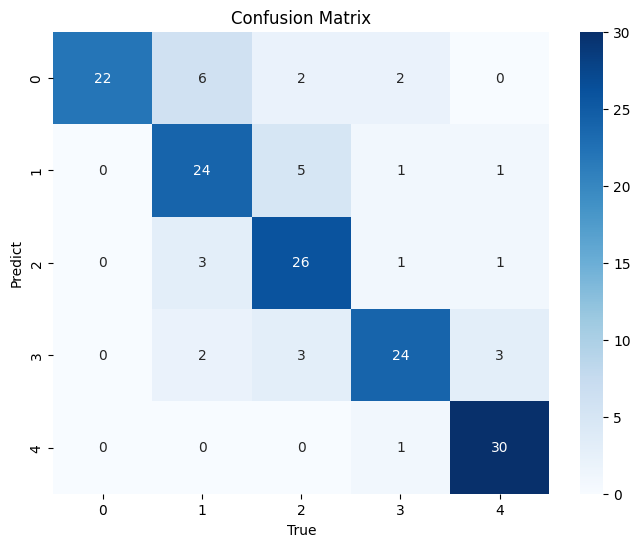

In [ ]:
cm =  confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.904
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.92      0.77      0.84        31
         2.0       0.88      0.94      0.91        31
         3.0       0.90      0.88      0.89        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.90       157
   macro avg       0.91      0.90      0.90       157
weighted avg       0.91      0.90      0.90       157



In [ ]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.903, 'Precision score': 0.906}


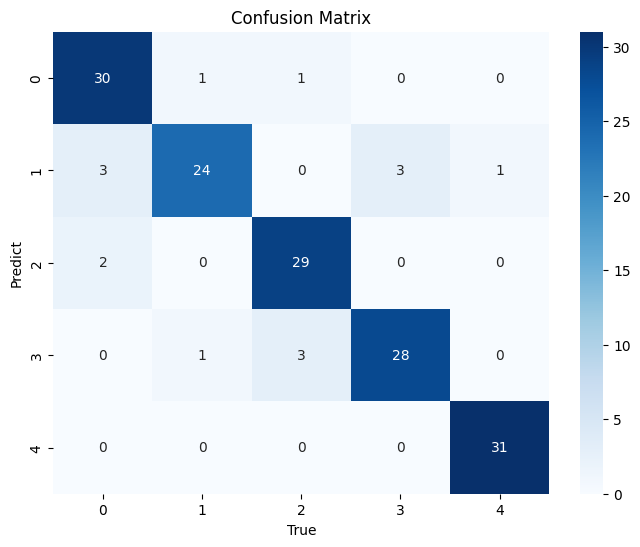

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85        32
         1.0       0.85      0.74      0.79        31
         2.0       0.84      0.87      0.86        31
         3.0       0.87      0.84      0.86        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



In [ ]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.866, 'recall': 0.866, 'F1 score': 0.865, 'Precision score': 0.868}


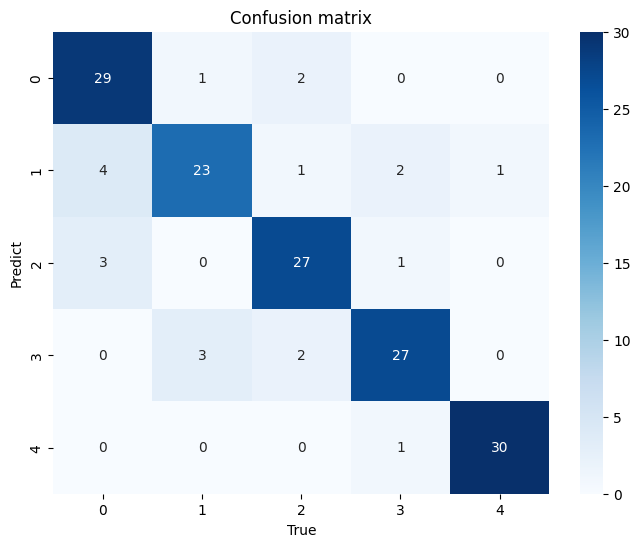

In [ ]:
cm = confusion_matrix(y_test,y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Oversample + Normalisasi

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Y_pred_knn = knn_model.predict(X_test_normal)

print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,Y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.803
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81        32
         1.0       0.69      0.77      0.73        31
         2.0       0.72      0.84      0.78        31
         3.0       0.83      0.75      0.79        32
         4.0       0.86      0.97      0.91        31

    accuracy                           0.80       157
   macro avg       0.82      0.80      0.80       157
weighted avg       0.82      0.80      0.80       157



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.803, 'recall': 0.803, 'F1 score': 0.803, 'Precision score': 0.82}


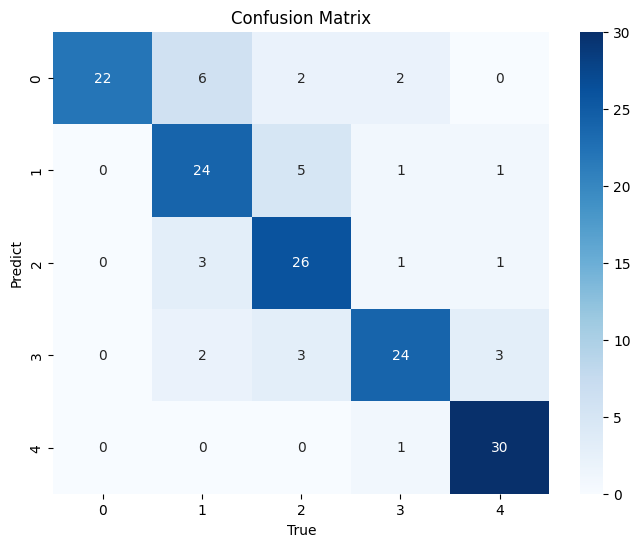

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.92      0.77      0.84        31
         2.0       0.88      0.94      0.91        31
         3.0       0.90      0.88      0.89        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.90       157
   macro avg       0.91      0.90      0.90       157
weighted avg       0.91      0.90      0.90       157



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.903, 'Precision score': 0.906}


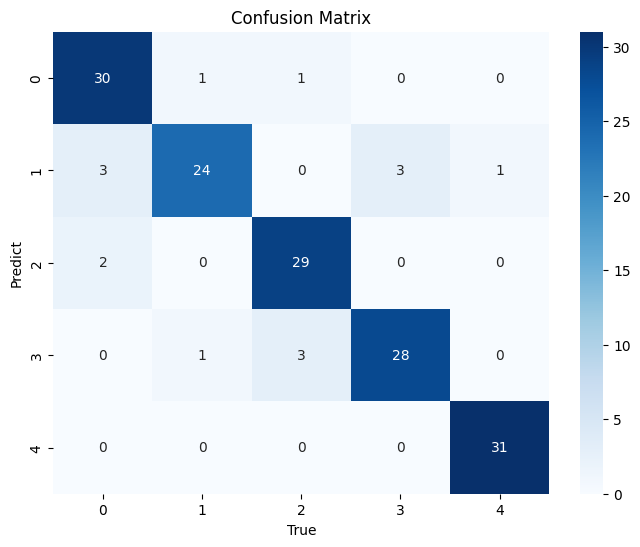

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.866
classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85        32
         1.0       0.85      0.74      0.79        31
         2.0       0.84      0.87      0.86        31
         3.0       0.87      0.84      0.86        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.866, 'recall': 0.866, 'F1 score': 0.865, 'Precision score': 0.868}


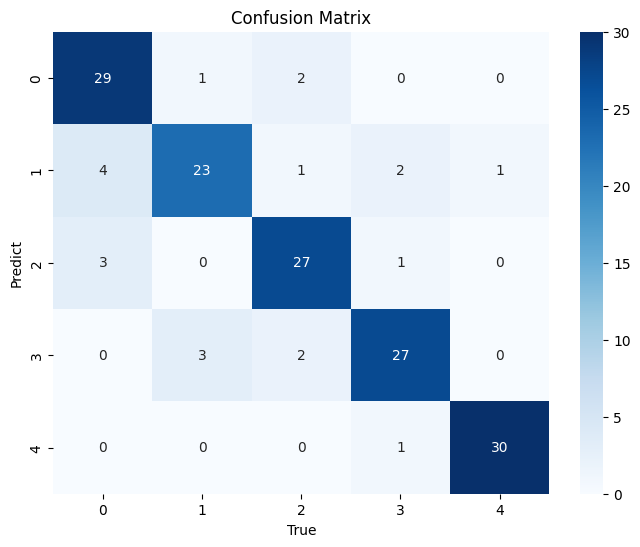

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Tunning + Normalisasi + Oversample

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 27, 'algorithm': 'ball_tree'}


In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:",accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84        32
         1.0       0.78      0.81      0.79        31
         2.0       0.85      0.94      0.89        31
         3.0       0.85      0.88      0.86        32
         4.0       0.91      0.97      0.94        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.866, 'recall': 0.866, 'F1 score': 0.865, 'Precision score': 0.871}


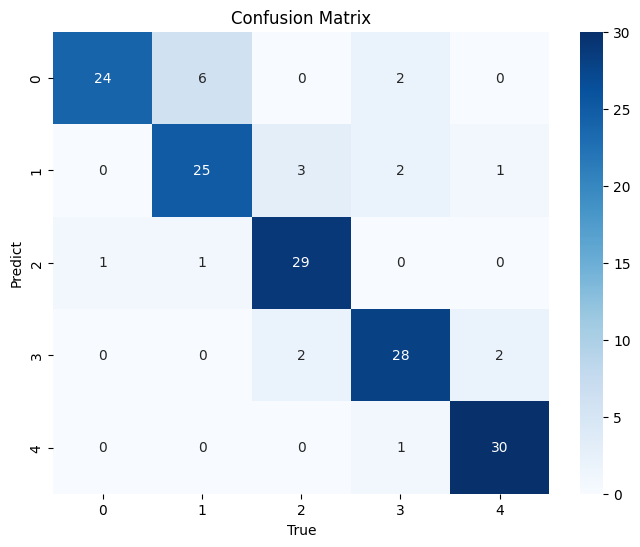

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

print("\nRandomForest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


RandomForest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86        32
         1.0       0.86      0.81      0.83        31
         2.0       0.90      0.90      0.90        31
         3.0       0.94      0.94      0.94        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.90       157
   macro avg       0.90      0.90      0.90       157
weighted avg       0.90      0.90      0.90       157



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.904}


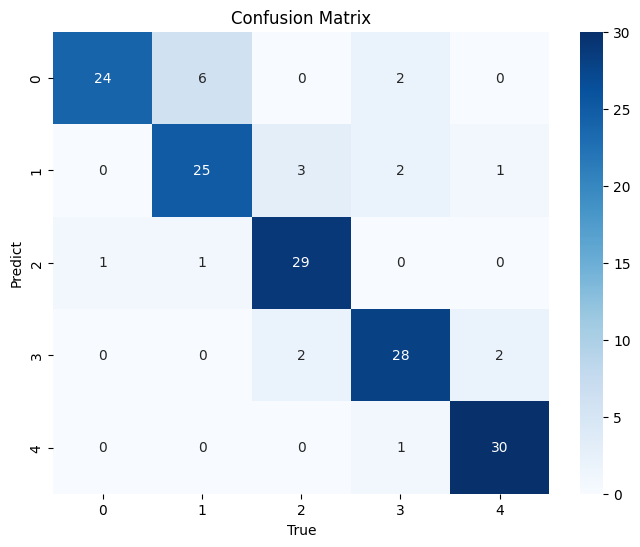

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [ ]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.82      0.74      0.78        31
         2.0       0.87      0.87      0.87        31
         3.0       0.84      0.81      0.83        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.866, 'recall': 0.866, 'F1 score': 0.865, 'Precision score': 0.866}


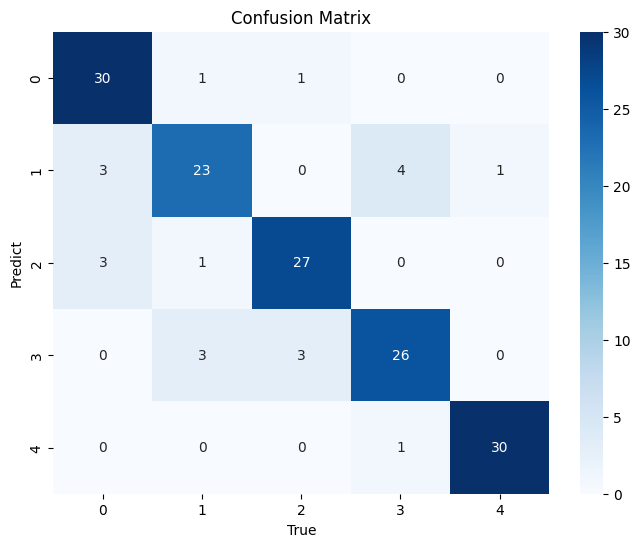

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)\

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Evaluasi

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
                                                               accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,80.3
1,Random Forest,90.4
2,XGBoost,86.6


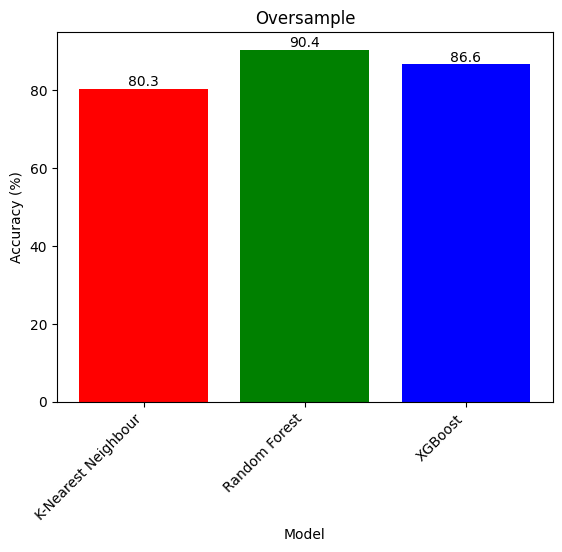

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                                                               accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,80.3
1,Random Forest,90.4
2,XGBoost,86.6


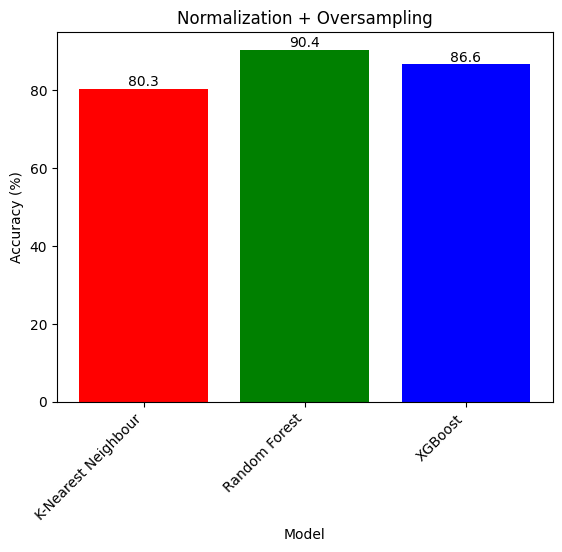

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                                                               accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.6
1,Random Forest,90.4
2,XGBoost,86.6


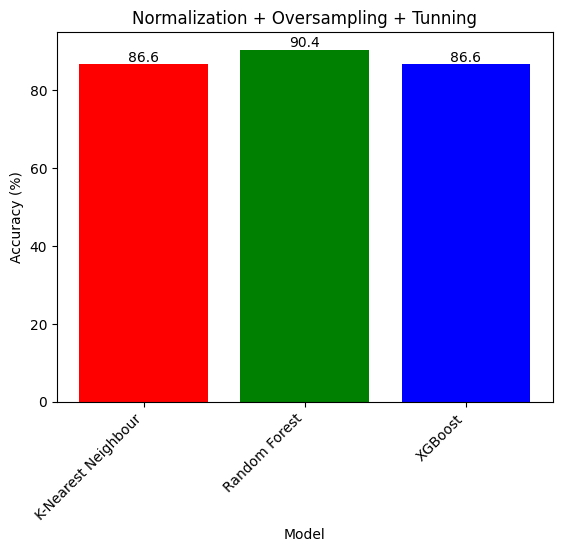

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

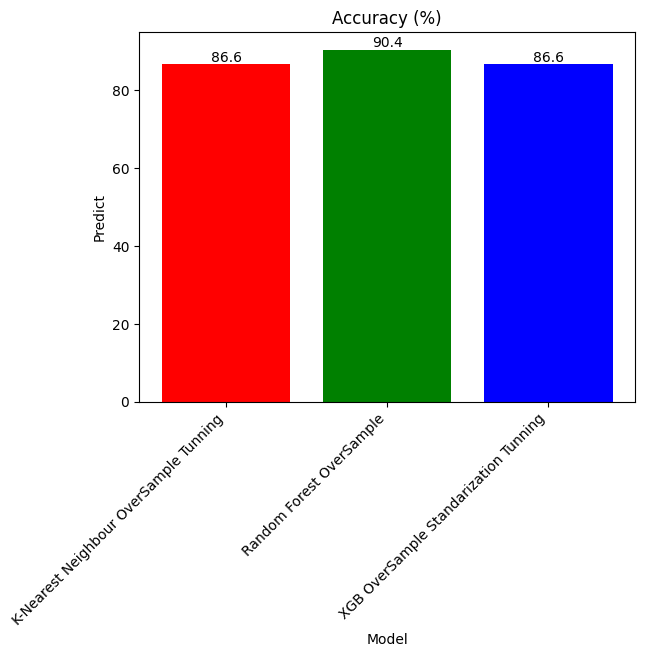

In [ ]:
model_compBest = pd.DataFrame({'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
                                         'XGB OverSample Standarization Tunning'],'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Predict')
plt.title('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()